### **Implementation Reinforcement Learning-Q Learning (Unsupervised learning)**
---

### **Import package**

In [69]:
import numpy as np 
import pylab as pl 
import networkx as nx 

<p align="center"><img src="https://i.ibb.co/fFvB3yB/Graph-1.jpg" alt="Graph-1" border="0"></p>

In [70]:
edges = [(0, 4), (1, 3), (1, 5), (2, 3), (3, 1), (3, 2),  
         (3, 4), (4, 3), (4, 0), (4, 5), (5, 1), 
         (5, 4), (5, 5)] 

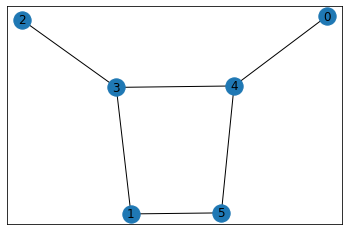

In [71]:
# Goal state 
goal = 5

# init graph
G = nx.Graph() 

# Add edges 
G.add_edges_from(edges) 

# position of node (x,y)
pos = nx.spring_layout(G) 

nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

## **Reward graph**
---
<p align="center"><img src="https://i.ibb.co/3FtrNZS/Reward-1.jpg" alt="Reward-1" border="0"></p>

## **Reward matrix**
---

<p align="center"><img src="https://i.ibb.co/mTydhYg/Reward-matrix.jpg" alt="Reward-matrix" border="0"></p>

In [72]:
# Define reward matrix 

# size = total number of nodes
size = 6

# (6x6) matrix 
reward_matrix = np.ones((size,size))
reward_matrix *= -1

for point in edges:
  if point[1]==goal:
    reward_matrix[point] = 100
  else:
    reward_matrix[point] = 0
  
print(reward_matrix)

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


## **Q matrix**
---

<p align="center"><img src="https://i.ibb.co/Z2ZQq0w/Q-Matrix.jpg" alt="Q-Matrix" border="0"></p>

In [73]:
# Define Q Matrix 

Q_matrix = np.zeros((size,size))
print(Q_matrix)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [74]:
def next_all_state(state):
  next_state = []
  for point in edges:
    if point[0] == state:
      next_state.append(point)

  Q_value = []
  for i in next_state:
    Q_value.append(Q_matrix[i])

  return Q_value

In [75]:
no_of_episode = 1000
gamma = 0.8

scores = []

for i in range(no_of_episode):

  # Randomly selecting the current state
  current_state = np.random.randint(0,int(Q_matrix.shape[0]))

  # get all reward of perticular state  
  current_state_row = reward_matrix[current_state, ]

  # select only those having reward greater then 0
  available_action = np.where(current_state_row >= 0)[0]

  # Now randomly choose any one state from available action list
  next_state = int(np.random.choice(available_action,1))

  # now find the Q[current_state,next_state] using bellman equation i.e 
  '''
  Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
  '''
  Q_matrix[current_state,next_state] = reward_matrix[current_state,next_state] + gamma * np.max(next_all_state(next_state))

  scores.append(Q_matrix[current_state,next_state])

## **Q Matrix before normalization**
---

<p align="center"><img src="https://i.ibb.co/XLk4TBF/Q-Before-Normalize.jpg" alt="Q-Before-Normalize" border="0"></p>

In [76]:
import math
for i in Q_matrix:
  for j in i:
    print(math.ceil(j),end= ' ')
  print()

0 0 0 0 400 0 
0 0 0 320 0 500 
0 0 0 320 0 0 
0 400 256 0 400 0 
320 0 0 320 0 500 
0 400 0 0 400 500 


In [77]:
# Normalization 

Q_matrix_copy = Q_matrix.copy()

for i in range(Q_matrix_copy.shape[0]):
  for j in range(Q_matrix_copy.shape[1]):
    if Q_matrix_copy[i,j]>0:
      Q_matrix_copy[i,j] = Q_matrix_copy[i,j]*100 / np.max(Q_matrix_copy)
    else:
      Q_matrix_copy[i,j] = 0

## **Q Matrix after normalization**
---

<p align="center"><img src="https://i.ibb.co/72NZHxg/Q-After-Normalize.jpg" alt="Q-After-Normalize" border="0"></p>

In [78]:
for i in Q_matrix_copy:
  for j in i:
    print(math.ceil(j),end= ' ')
  print()

0 0 0 0 80 0 
0 0 0 64 0 101 
0 0 0 64 0 0 
0 80 52 0 80 0 
64 0 0 64 0 101 
0 80 0 0 81 100 


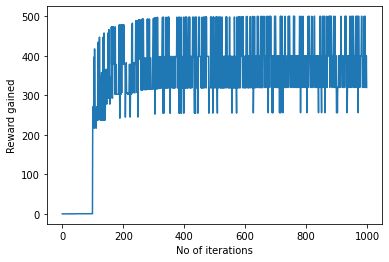

In [92]:
import matplotlib.pyplot as plt

# normalizing the value of scores 
for i in range(100):
  scores[i] = scores[i] / np.max(scores)

plt.plot(list(range(1000)),scores)
plt.xlabel('No of iterations') 
plt.ylabel('Reward gained') 
plt.show() 

In [93]:
# Finding the optimal path , based on the provided start state to goal state

def get_optimal_path(start_state,goal_state):
  '''
  Function return : Optimal route from start to goal state
  '''
  # initialize the optimal route with starting location
  route = [start_state]

  # we will select current state as start state
  current_state = start_state

  # we don't about the exact number of iteration needed to reach to final location 
  # so while loop would be good choice

  while (current_state != goal_state):

    # we will select a current_state whose Q value is maximum  
    next_step_location = np.where(Q_matrix_copy[current_state, ] == np.max(Q_matrix_copy[current_state, ]))[0]

    # This condition is for , when we get more than one value whose Q value is same . eg [1,3] 
    # so then we randomly choose one of them 
    if next_step_location.shape[0] > 1: 
        next_step_location = int(np.random.choice(next_step_location, size = 1)) 
    else: 
        next_step_location = int(next_step_location) 

    # Append the next location in the route
    route.append(next_step_location)

    # define next_location
    current_state = next_step_location
  
  return route

## **Optimal path from start state to goal state** 
---
<p align="center"><img src="https://i.ibb.co/H49brkf/Final-Path.jpg" alt="Final-Path" border="0"></p>

In [110]:
optimal_path = get_optimal_path(2,5)

for index,value in enumerate(optimal_path):
  if index == 0:
    print(f'Optimal path : \t{value}\t',end = '➡️' )
  elif index == len(optimal_path)-1:
    print(f'\t{value}')
  else:
    print(f'\t{value}',end = '\t➡️')

Optimal path : 	2	➡️	3	➡️	4	➡️	5
